This is the template for the CIS 419/519 Homework 3.
The areas where you need to make changes are marked with "TODO"


In [0]:
# Running this cell will download the CIFAR data to the machine that the
# notebook is running on. You may need to rerun this every time you open
# the notebook
!wget https://www.seas.upenn.edu/~ddeutsch/train_images.npy
!wget https://www.seas.upenn.edu/~ddeutsch/train_labels.npy
!wget https://www.seas.upenn.edu/~ddeutsch/valid_images.npy
!wget https://www.seas.upenn.edu/~ddeutsch/valid_labels.npy
!wget https://www.seas.upenn.edu/~ddeutsch/test_images.npy
!wget https://www.seas.upenn.edu/~ddeutsch/test_labels.npy

--2019-11-18 22:15:20--  https://www.seas.upenn.edu/~ddeutsch/train_images.npy
Resolving www.seas.upenn.edu (www.seas.upenn.edu)... 158.130.68.91, 2607:f470:8:64:5ea5::9
Connecting to www.seas.upenn.edu (www.seas.upenn.edu)|158.130.68.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24576128 (23M)
Saving to: ‘train_images.npy’

train_images.npy    100%[===================>]  23.44M  4.75MB/s    in 5.3s    

2019-11-18 22:15:26 (4.41 MB/s) - ‘train_images.npy’ saved [24576128/24576128]

--2019-11-18 22:15:27--  https://www.seas.upenn.edu/~ddeutsch/train_labels.npy
Resolving www.seas.upenn.edu (www.seas.upenn.edu)... 158.130.68.91, 2607:f470:8:64:5ea5::9
Connecting to www.seas.upenn.edu (www.seas.upenn.edu)|158.130.68.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64128 (63K)
Saving to: ‘train_labels.npy’

train_labels.npy    100%[===================>]  62.62K   391KB/s    in 0.2s    

2019-11-18 22:15:28 (391 KB/s) - ‘train_label

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [0]:
# This cell has the code to load the datasets. You should not need
# to edit this cell unless you want to do the extra credit. If you do
# you should only need to edit normalize_images.
class CIFARDataset(Dataset):
  def __init__(self, X, y):
    self.len = len(X)
    self.X = torch.FloatTensor(X).cuda()
    self.y = torch.LongTensor(y).cuda()
  
  def __len__(self):
    return self.len

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


def normalize_images(X_train, X_valid, X_test):
  """
  Normalizes the images based on the means and standard deviations
  of the training channels. Returns the new normalized images.
  """
  # TODO Implement this method for the extra credit experiments
  mean = X_train.mean()
  std = X_train.std()
  X_train = (X_train - mean)/std
  X_valid = (X_valid - mean)/std
  X_test = (X_test - mean)/std
  print("mean:" + str(X_train.mean()))
  print("std:" + str(X_train.std()))
  return X_train, X_valid, X_test

    

def load_datasets(normalize=False):
  X_train = np.load('train_images.npy').astype(float)
  y_train = np.load('train_labels.npy')
  X_valid = np.load('valid_images.npy').astype(float)
  y_valid = np.load('valid_labels.npy')
  X_test = np.load('test_images.npy').astype(float)
  y_test = np.load('test_labels.npy')

  if normalize:
    X_train, X_valid, X_test = normalize_images(X_train, X_valid, X_test)
  
  train_data = CIFARDataset(X_train, y_train)
  valid_data = CIFARDataset(X_valid, y_valid)
  test_data = CIFARDataset(X_test, y_test)
  
  return train_data, valid_data, test_data

In [0]:
# This is the implementation of the first network architecture. We have
# started it, but you need to finish it. Do not change the class name
# or the name of the data members "fc1" or "fc2"
class FeedForward(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = torch.nn.Linear(3072, 1000)
    # TODO
    # You need to add the second layer's parameters
    self.fc2 = torch.nn.Linear(1000, 10)

  def forward(self, X):
    batch_size = X.size(0)
    # This next line reshapes the tensor to be size (B x 3072)
    # so it can be passed through a linear layer.
    X = X.view(batch_size, -1)
    # TODO
    # You need to pass X through the two linear layers and relu
    X = torch.nn.functional.relu(self.fc1(X))
    X = self.fc2(X)
    # then return the final scores
    return X
 
  

In [0]:
# This is the implementation of the second network architecture. We have
# started it, but you need to finish it. Do not change the class name
# or the name of the data members "conv1", "pool", "conv2", "fc1", "fc2",
# or "fc3".
class Convolutional(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=3,
                                 out_channels=7,
                                 kernel_size=3,
                                 stride=1,
                                 padding=0)
    # TODO
    # You need to add the pooling, second convolution, and
    # three linear modules here
    self.pool = torch.nn.MaxPool2d(2, stride=2)
    self.conv2 = torch.nn.Conv2d(in_channels=7,
                                 out_channels=16,
                                 kernel_size=3,
                                 stride=1,
                                 padding=0)
    self.fc1 = torch.nn.Linear(2704, 130)
    self.fc2 = torch.nn.Linear(130, 72)
    self.fc3 = torch.nn.Linear(72, 10)

  def forward(self, X):
    batch_size = X.size(0)
    # TODO
    # You need to implement the full network architecture here
    X = self.conv1(X)
    X = self.pool(X)
    X = self.conv2(X)
    X = torch.nn.functional.relu(X)
    X = X.view(batch_size, -1)
    X = torch.nn.functional.relu(self.fc1(X))
    X = torch.nn.functional.relu(self.fc2(X))
    X = torch.sigmoid(self.fc3(X))
    # and return the final scores
    return X
    


In [0]:
# You need to finish implementing this method
def compute_loss_and_accuracy(network, data_loader):
  """
  Given a network, iterate over the dataset defined by the data_loader
  and compute the accuracy of the model and the average loss.
  """
  # This should be used to accumulate the total loss on the dataset
  total_loss = 0

  # This should count how many examples were correctly classified.
  num_correct = 0

  # This should count the number of examples in the dataset. (Be careful
  # because it should -not- be the number of batches.)
  num_instances = 0

  # The CrossEntropyLoss by default will return the average loss
  # for the batch. So, when you accumulate the total_loss, make sure
  # to multiply the loss computed by CrossEntropyLoss by the batch size?
  cross_entropy_loss = torch.nn.CrossEntropyLoss()

  for X, y in data_loader:
    # TODO
    # You need to implement computing the loss and
    # calculate the number of correct examples.  
    output = network(X)
    loss = cross_entropy_loss(output, y)
    total_loss += loss.item()
    for idx, y_pred in enumerate(output):
      if torch.argmax(y_pred) == y[idx]:
        num_correct += 1
      num_instances += 1
  
  accuracy = num_correct / num_instances * 100
  average_loss = total_loss / num_instances
  return accuracy, average_loss

In [0]:
# You need to finish implementing this method
def run_experiment(network, train_data_loader, valid_data_loader, optimizer):
  # This will be a list of the average training losses for each epoch
  train_losses = []

  # This will be a list of the average validation losses for each epoch
  valid_accs = []

  # This will be a list of the validation accuracies for each epoch
  valid_losses = []

  # The CrossEntropyLoss by default will return the average loss
  # for the batch. So, when you accumulate the total_loss, make sure
  # to multiply the loss computed by CrossEntropyLoss by the batch size
  cross_entropy_loss = torch.nn.CrossEntropyLoss()

  for epoch in range(200):
    # This should be used to accumulate the total loss on the training data
    total_loss = 0.0

    # This should be used to count the number of training examples. (Be careful
    # because this is not the number of batches)
    num_instances = 0

    for X, y in train_data_loader:
      # TODO
      # You need to implement computing the loss for this batch
      # and updating the model's parameters.
      batch_size = X.size(0)
      optimizer.zero_grad() # make sure to zero the parameter gradients in each batch!
      output = network(X) # forward
      loss = cross_entropy_loss(output, y) # compute loss
      loss.backward() # back prop
      optimizer.step() # update weights(parameter)
      total_loss += loss.item()* batch_size # accumulate the total loss
      num_instances += 1 * batch_size

    train_loss = total_loss / num_instances
    valid_acc, valid_loss = compute_loss_and_accuracy(network, valid_data_loader)

    train_losses.append(train_loss)
    valid_accs.append(valid_acc)
    valid_losses.append(valid_loss)
  return train_losses, valid_accs, valid_losses

In [0]:
# Load the data and create the iterators. You should not need
# to modify this cell
train_data, valid_data, test_data = load_datasets(normalize=False)
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=64)
test_data_loader = DataLoader(test_data, batch_size=64)

LR = 0.0001, Valid Acc: 41.65
LR = 5e-05, Valid Acc: 39.85
LR = 1e-05, Valid Acc: 35.199999999999996
Test Accuracy: 39.2


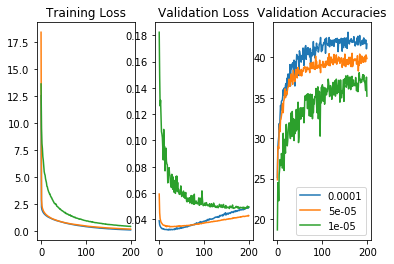

In [0]:
# Implements the FeedForward experiment. You can base the Convolutional experiment
# on this code. You should not need to edit this cell.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [0.0001, 0.00005, 0.00001]:
  network = FeedForward()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))

LR = 0.01, Valid Acc: 50.24999999999999
LR = 0.001, Valid Acc: 47.5
LR = 0.0001, Valid Acc: 38.4
Test Accuracy: 48.9


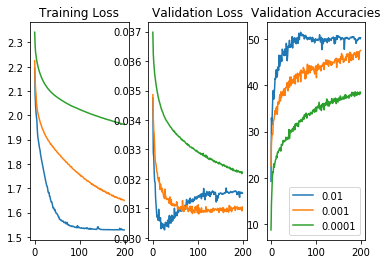

In [0]:
# TODO
# You should implement the Convolutional experiment here. It should be
# very similar to the cell above.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [0.01, 0.001, 0.0001]:
  network = Convolutional()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))

In [0]:
# TODO
# If you want to run the extra credit experiment, repeat the above experiments
# but load the normalized data.
train_data, valid_data, test_data = load_datasets(normalize=True)
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=64)
test_data_loader = DataLoader(test_data, batch_size=64)

mean:1.0443497918307306e-16
std:1.0000000000000013


LR = 0.1, Valid Acc: 47.599999999999994
LR = 0.08, Valid Acc: 48.6
LR = 0.06, Valid Acc: 48.4
LR = 0.04, Valid Acc: 48.449999999999996
LR = 0.02, Valid Acc: 47.65
LR = 0.01, Valid Acc: 47.05
LR = 0.001, Valid Acc: 46.45
LR = 0.0001, Valid Acc: 41.15
LR = 5e-05, Valid Acc: 37.4
LR = 1e-05, Valid Acc: 29.65
Test Accuracy: 46.6


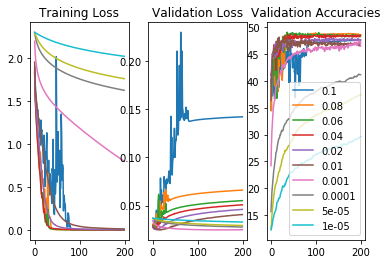

In [0]:
# Implements the FeedForward experiment. You can base the Convolutional experiment
# on this code. You should not need to edit this cell.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [0.1
           , 0.08, 0.06, 0.04, 0.02, 0.01, 0.001, 0.0001, 0.00005, 0.00001]:
  network = FeedForward()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))

LR = 0.25, Valid Acc: 49.6
LR = 0.2, Valid Acc: 52.15
LR = 0.17, Valid Acc: 51.5
LR = 0.15, Valid Acc: 50.6
LR = 0.13, Valid Acc: 50.4
LR = 0.1, Valid Acc: 49.55
LR = 0.05, Valid Acc: 48.35
LR = 0.01, Valid Acc: 49.3
LR = 0.001, Valid Acc: 25.85
LR = 0.0001, Valid Acc: 11.1
Test Accuracy: 51.800000000000004


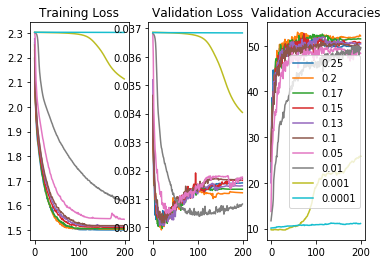

In [0]:
# TODO
# You should implement the Convolutional experiment here. It should be
# very similar to the cell above.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [ 0.25, 0.2, 0.17, 0.15, 0.13, 0.1, 0.05, 0.01, 0.001, 0.0001]:
  network = Convolutional()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))